In [1]:
from top2vec import Top2Vec

/Users/finnfeddersen/Documents/SynologyDrive/01 Data Science/2. Semester/03 Natural Language Processing/Final Project/.venv/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/finnfeddersen/Documents/SynologyDrive/01 Data Science/2. Semester/03 Natural Language Processing/Final Project/.venv/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/d

In [1]:
# read in dataframe, only use the columns: reviewText, summary, overall, asin
df = pd.read_csv('apple_preprocessed.csv')

NameError: name 'pd' is not defined

# 5 Top2Vec
- However, if our data set also contains partitions with high concentrations of objects
- repetitions due to nature of data set, since filtering for apple products means people talk about the same products and features

hdbscan_args = {'min_cluster_size': 100,
                'min_samples': 20,
                'metric': 'euclidean',
                'cluster_selection_method': 'eom',
                'cluster_selection_epsilon': 0.25}

In [166]:
corpus = list(df["corpus"])

In [167]:
hdbscan_args = {'min_cluster_size': 100,
                'min_samples': 20,
                'metric': 'euclidean',
                'cluster_selection_method': 'eom',
                'cluster_selection_epsilon': 0.28}

In [168]:
model = Top2Vec(documents=corpus, speed="deep-learn", workers=-1, embedding_model="universal-sentence-encoder-multilingual", hdbscan_args=hdbscan_args)

2023-05-23 18:02:54,711 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/Users/finnfeddersen/Documents/SynologyDrive/01 Data Science/2. Semester/03 Natural Language Processing/Final Project/.venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-05-23 18:03:04,674 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
2023-05-23 18:03:09,504 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-05-23 18:06:01,584 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-05-23 18:06:46,649 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas o

In [169]:
model.get_num_topics()

15

In [170]:
topic_sizes, topic_nums = model.get_topic_sizes()
print(topic_sizes)

[16954  7851  7468  5665  3275  2259  1364  1324  1306  1227  1192  1178
  1130   800   309]


In [171]:
topic_words, word_scores, topic_nums = model.get_topics(5)

In [172]:
print(topic_words)
print(word_scores)

[['iphone' 'iphones' 'phone' 'cellphone' 'phones' 'htc' 'smartphone'
  'telephone' 'tmobile' 'blackberry' 'smartphones' 'earphone' 'handy'
  'jailbroken' 'otterbox' 'imei' 'gsm' 'android' 'verizon' 'refurbished'
  'headphone' 'touchscreen' 'samsung' 'ipod' 'earphones' 'apple'
  'tracfone' 'macbook' 'refurbish' 'cellular' 'refurb' 'repaired'
  'mobile' 'droid' 'ipods' 'overpriced' 'digitizer' 'ios' 'texting'
  'excelente' 'ipad' 'icloud' 'outdated' 'warranty' 'fine' 'good'
  'excellent' 'gps' 'okay' 'great']
 ['charger' 'battery' 'iphone' 'batteries' 'iphones' 'charging'
  'chargers' 'ipod' 'cellphone' 'ipods' 'apple' 'macbook' 'jailbroken'
  'otterbox' 'headphone' 'earphone' 'ipad' 'recharge' 'htc' 'phone'
  'ipads' 'charged' 'earphones' 'charge' 'plugged' 'wireless'
  'blackberry' 'phones' 'laptop' 'adapter' 'smartphone' 'cord' 'earbuds'
  'overpriced' 'handy' 'apples' 'headset' 'icloud' 'tmobile' 'usb'
  'repaired' 'headphones' 'fine' 'mac' 'adaptor' 'android' 'gsm' 'refurb'
  'bumme

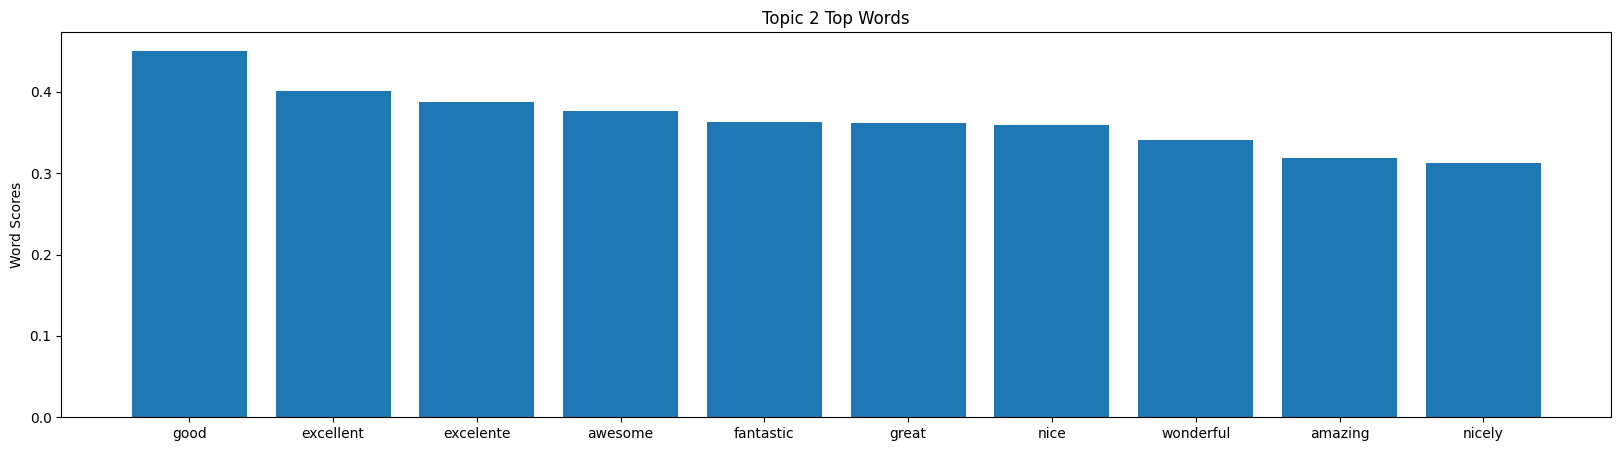

In [173]:
# Topic 2
# create a bar plot of the top 10 words for topic 2
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(np.arange(10), word_scores[1][:10][::-1], align='center')
ax.set_xticks(np.arange(10))
ax.set_xticklabels(topic_words[2][:10][::-1])
ax.invert_xaxis()
ax.set_ylabel('Word Scores')
ax.set_title('Topic 2 Top Words')
plt.show()

In [174]:
words, word_scores = model.similar_words(keywords=["charger"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

chargers 0.8740831944479797
charging 0.7859392207944393
recharge 0.7052349821876229
charge 0.6952741243726642
charged 0.6311102234638233
load 0.6300227921832524
plugged 0.6252231548312158
batteries 0.6131438323557197
battery 0.6046473839866624
cord 0.5902141564171675
adapter 0.5896651026639217
plugs 0.5814869372543607
plug 0.5768460621530966
powered 0.5753010536496055
cords 0.5750778070295298
outlet 0.5638627444822233
charges 0.5608444802419663
adaptor 0.5602437275414289
carrier 0.5585326209195312
cable 0.5369163135992385


In [175]:
#topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["mac"], num_topics=20)
#print(topic_words)
#print(word_scores)
#print(topic_scores)

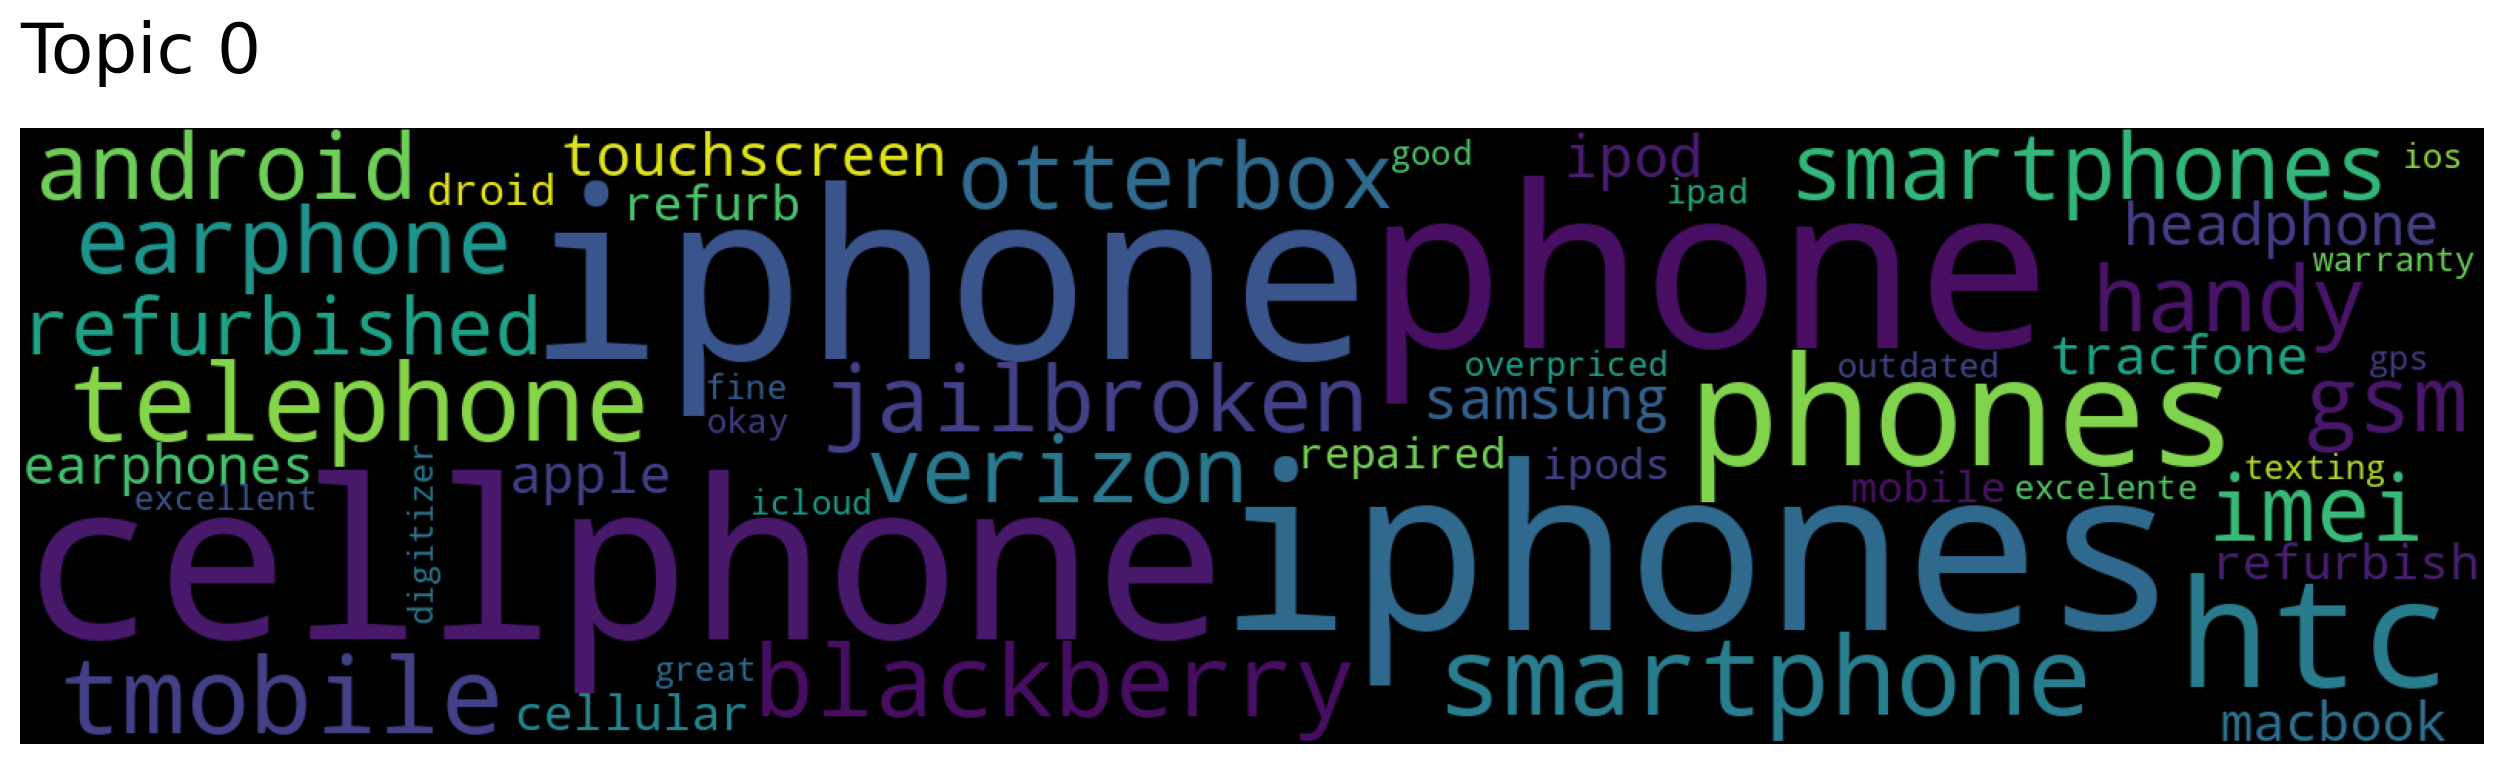

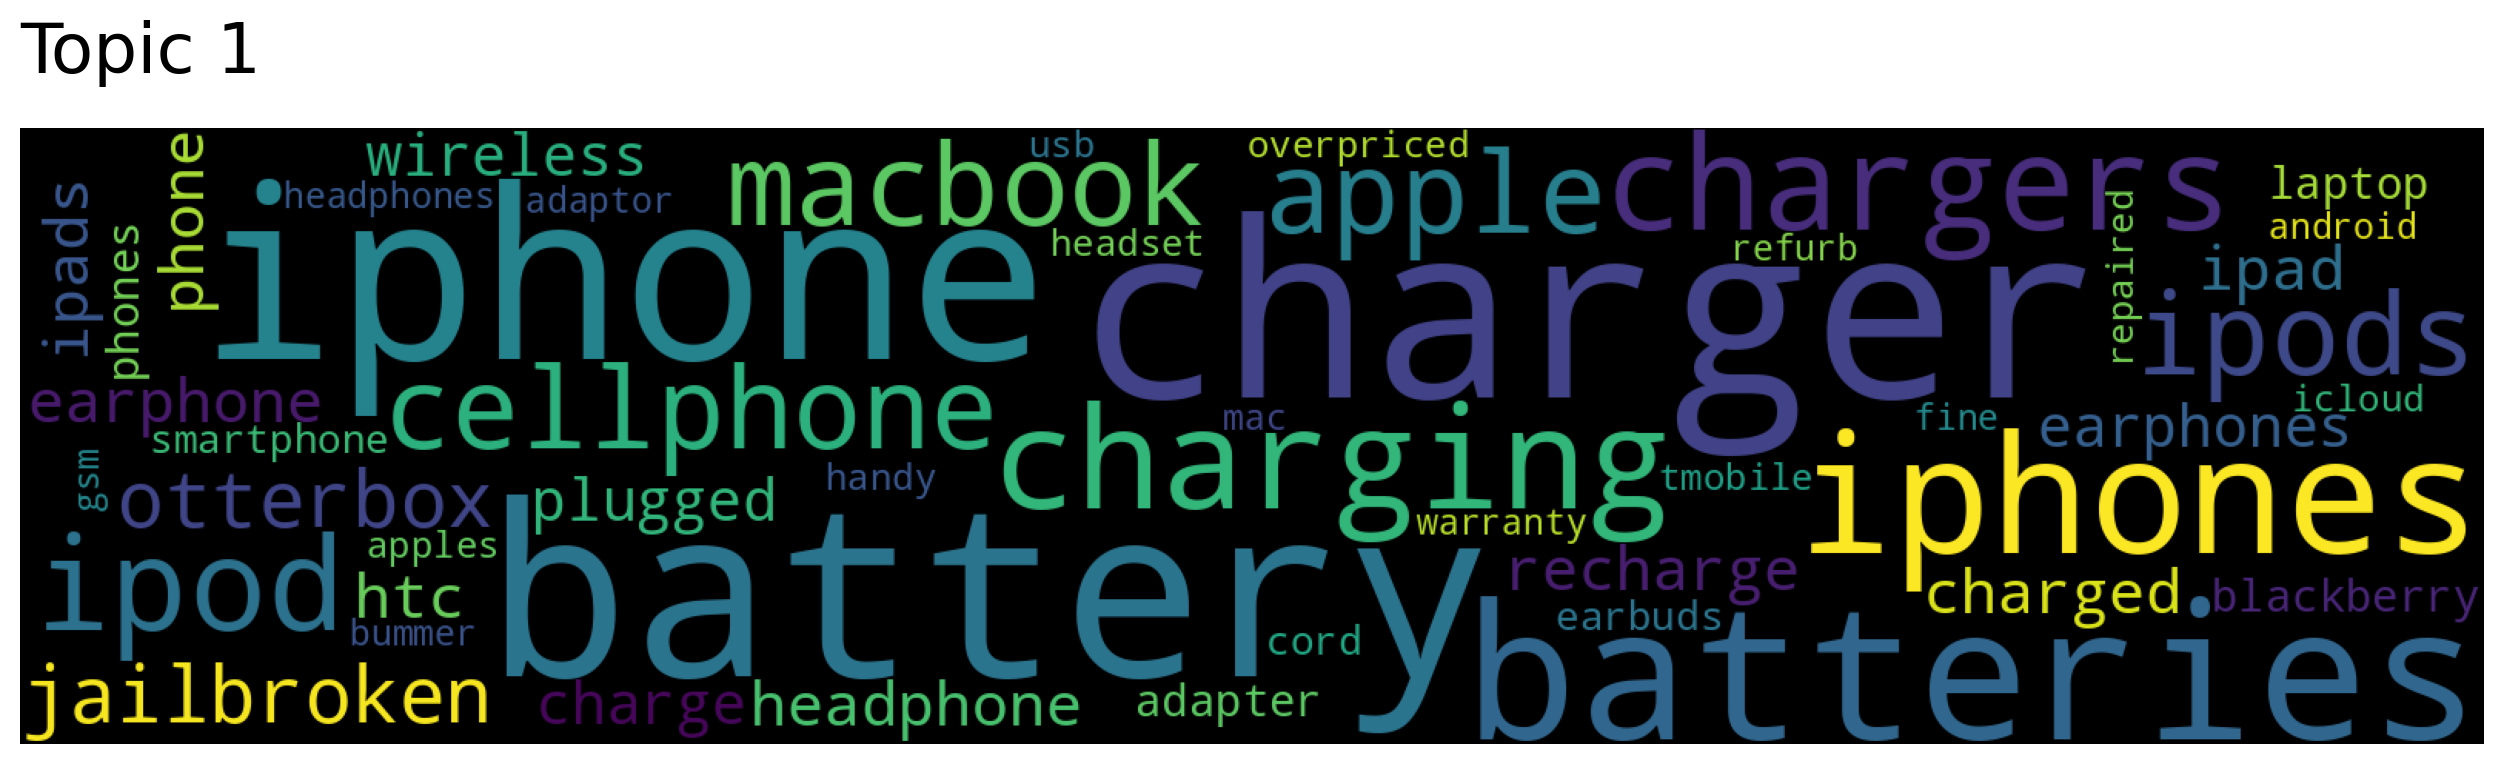

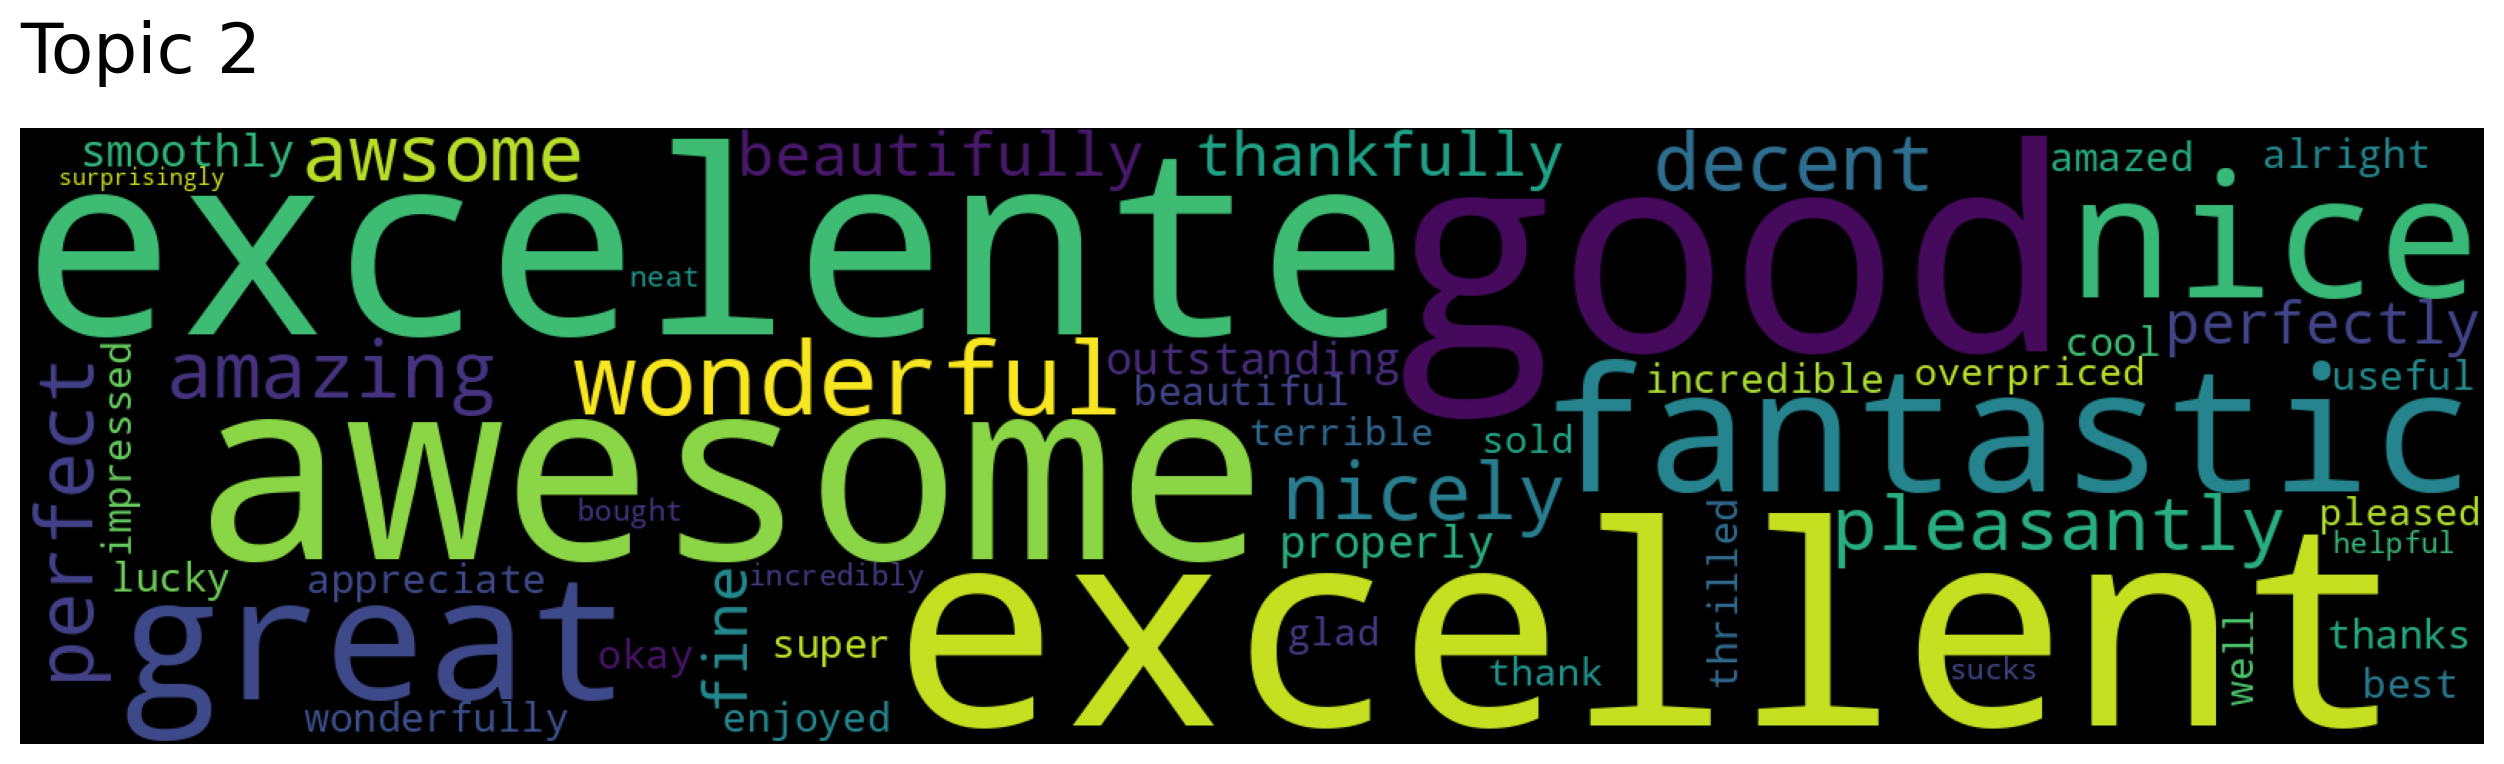

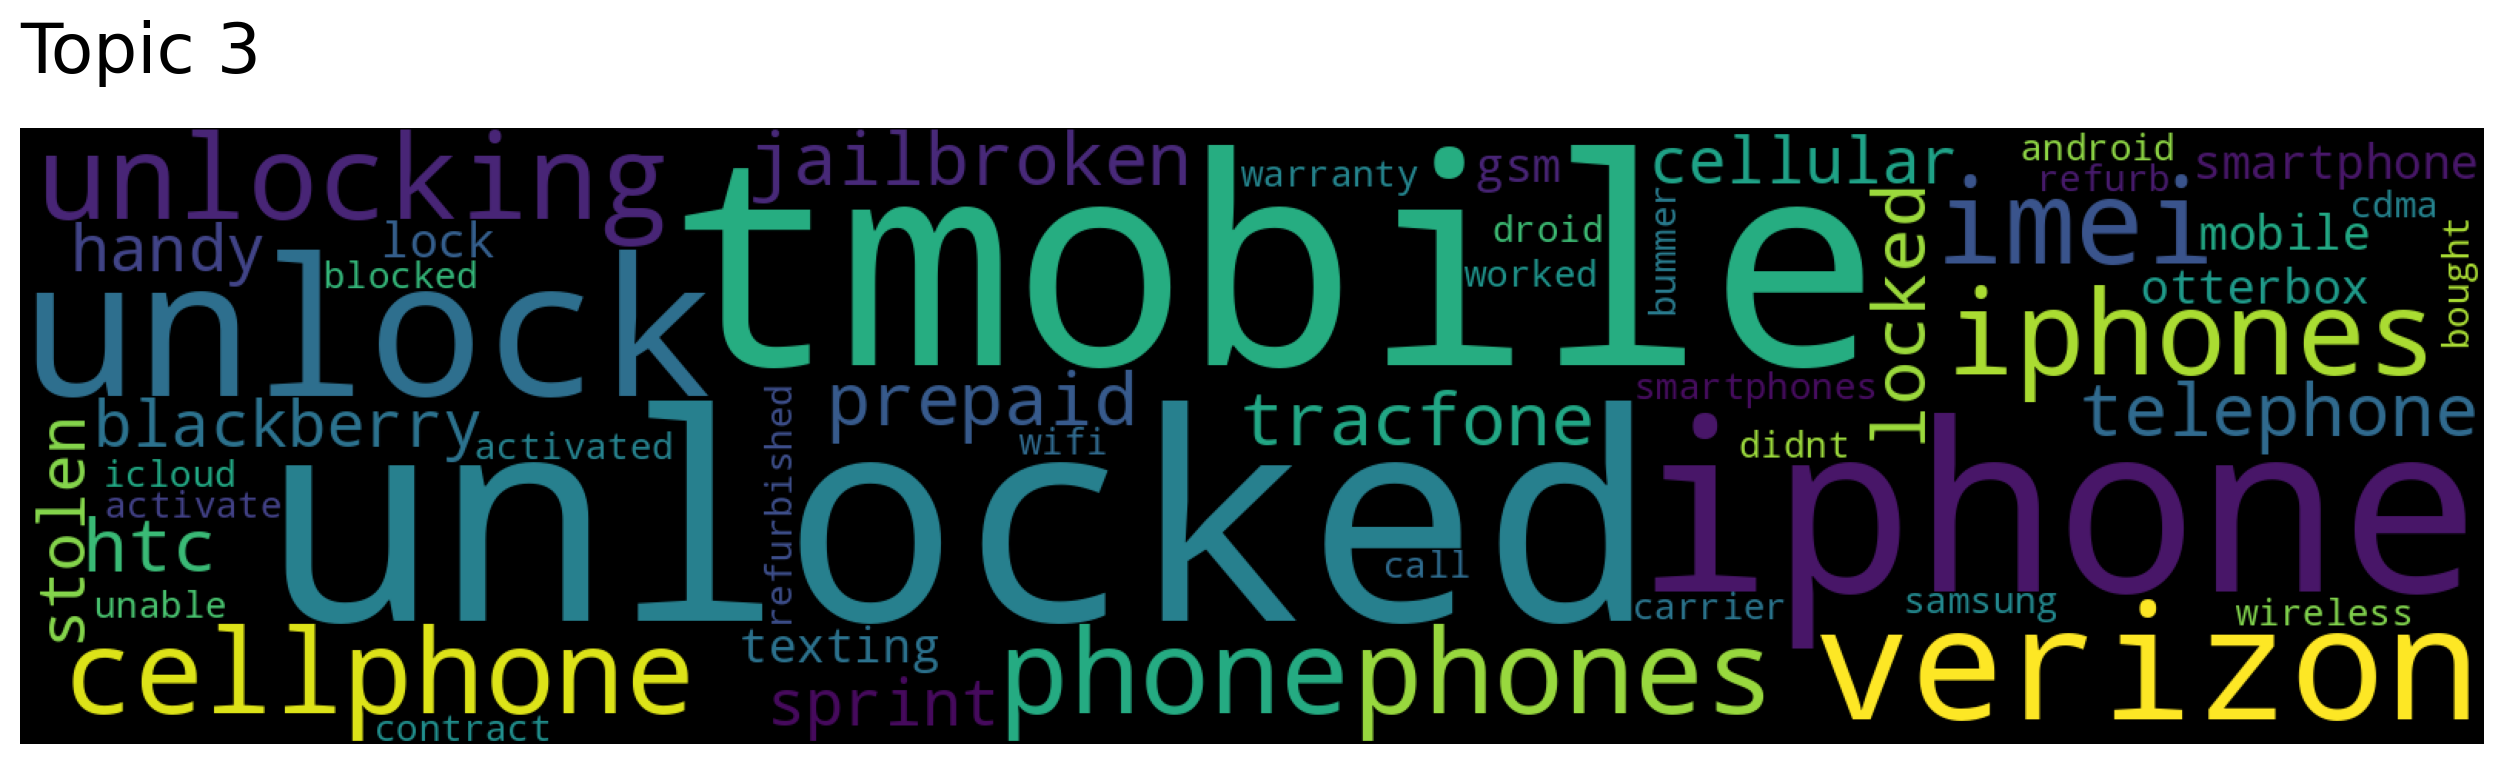

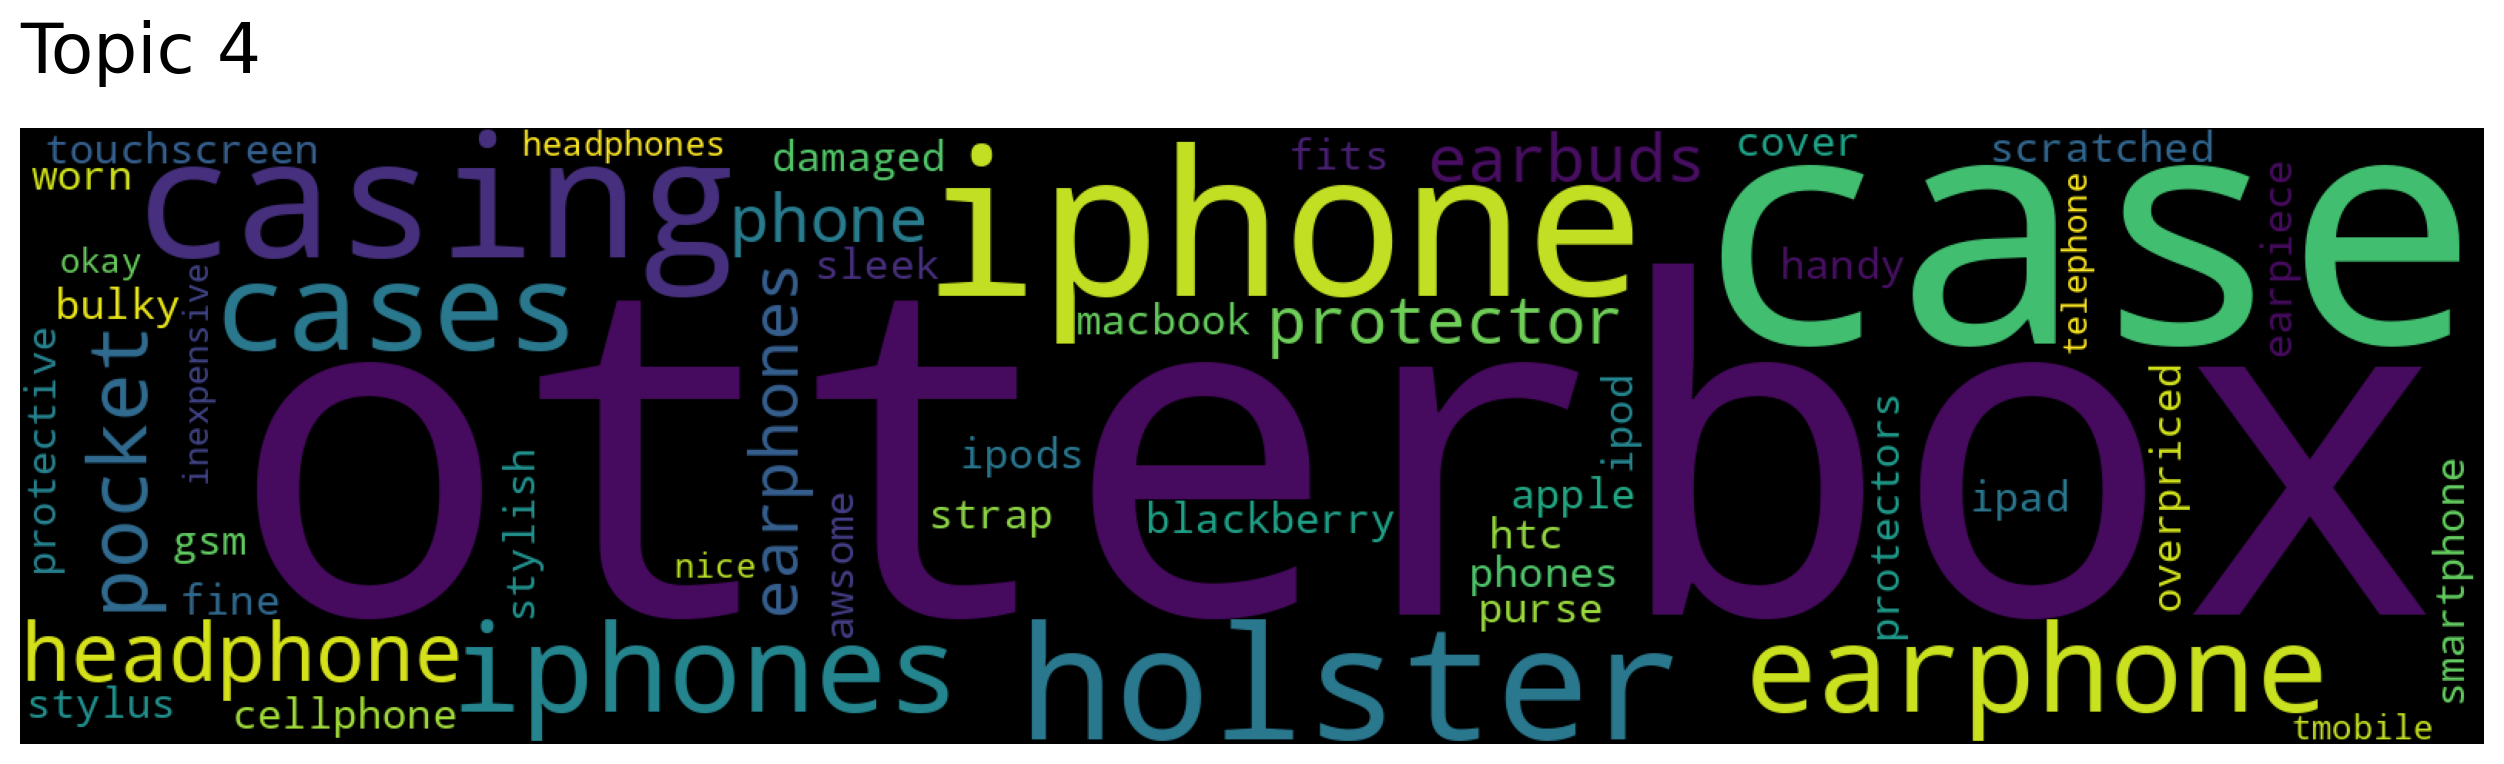

In [176]:
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

/var/folders/6s/hmlg0x1n07x_fl9blny_v37r0000gn/T/ipykernel_1912/2780658840.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], marker='.', s=5, cmap='viridis')


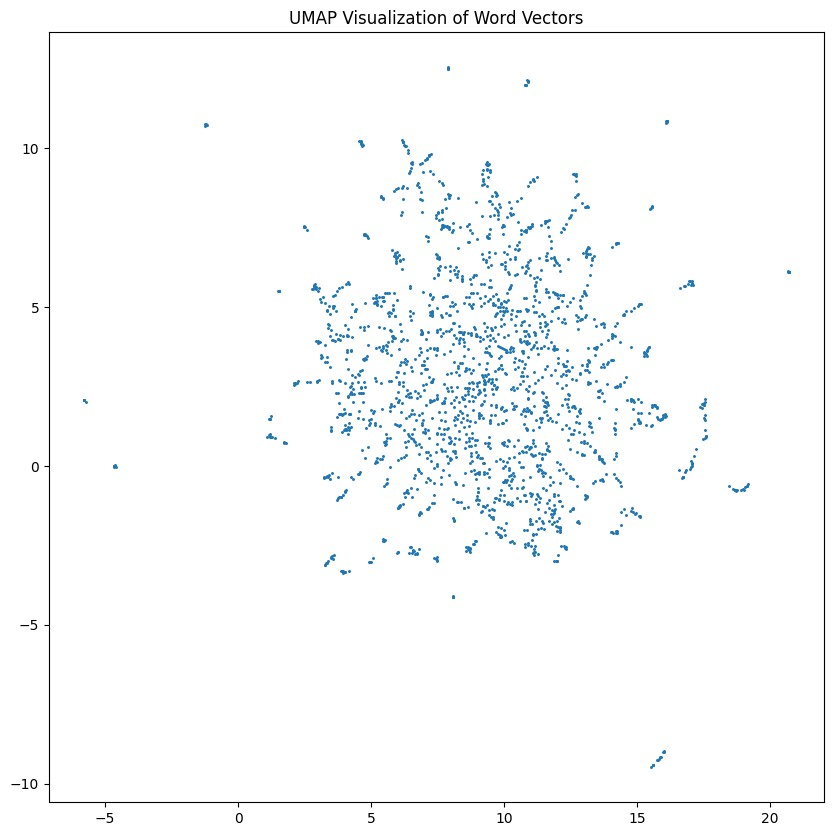

In [ ]:
import numpy as np

word_vectors = model.word_vectors
_, _, topic_labels = model.get_topics()

# Assuming you have the word vectors stored in a variable called `word_vectors`
# Assuming you have the topic labels stored in a variable called `topic_labels`

# Apply UMAP for dimensionality reduction
umap_embeddings = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='cosine').fit_transform(word_vectors)

# Plot the UMAP embeddings
plt.figure(figsize=(10, 10))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], marker='.', s=5, cmap='viridis')
plt.title('UMAP Visualization of Word Vectors')
plt.show()